In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

df = pd.read_csv('../data/heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
#shape
df.shape

(8763, 26)

In [4]:
#check for data types
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [5]:
#check for missing values
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [6]:
#making column titles consistent
df.columns = [column.lower().replace(" ","_") for column in df.columns]


In [7]:
#dividing blood_pressure column into two. First number is systolic pressure and second
#is diastolic pressure

df['systolic_pressure'] = df['blood_pressure'].apply(lambda x: x.split("/")[0])
df['diastolic_pressure'] = df['blood_pressure'].apply(lambda x: x.split("/")[1])
df = df.drop(columns='blood_pressure')

df

,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic_pressure,diastolic_pressure
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,61,1,1,1,0,1,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,QSV6764,28,Female,120,73,1,0,0,1,0,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,XKA5925,47,Male,250,105,0,1,1,1,1,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,EPE6801,36,Male,178,60,1,0,1,0,0,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [8]:
df.drop(columns='patient_id',inplace=True)
df

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic_pressure,diastolic_pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,28,Female,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,47,Male,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,36,Male,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [9]:
df = df.drop(columns=['continent','hemisphere'])

In [10]:
#change heart attack risk to boolean

df['heart_attack_risk'] = df['heart_attack_risk'].astype(int)
df['systolic_pressure'] = df['systolic_pressure'].astype(int)
df['diastolic_pressure'] = df['diastolic_pressure'].astype(int)
df.dtypes

age                                  int64
sex                                 object
cholesterol                          int64
heart_rate                           int64
diabetes                             int64
family_history                       int64
smoking                              int64
obesity                              int64
alcohol_consumption                  int64
exercise_hours_per_week            float64
diet                                object
previous_heart_problems              int64
medication_use                       int64
stress_level                         int64
sedentary_hours_per_day            float64
income                               int64
bmi                                float64
triglycerides                        int64
physical_activity_days_per_week      int64
sleep_hours_per_day                  int64
country                             object
heart_attack_risk                    int64
systolic_pressure                    int64
diastolic_p

### EDA

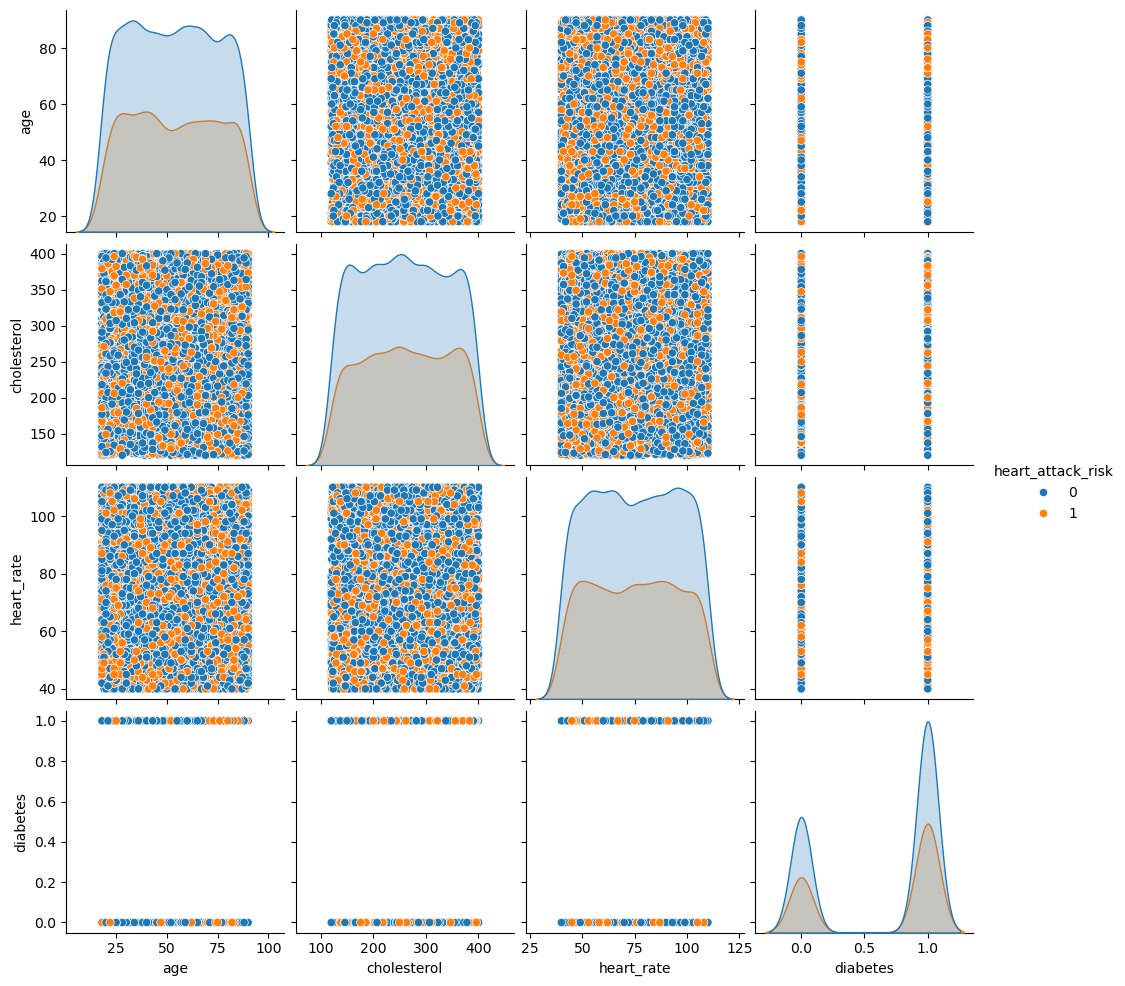

In [12]:
#QUICK EDA

subset1 = df.iloc[:, 0:5]
subset1['heart_attack_risk'] = df['heart_attack_risk']

sns.pairplot(subset1, hue='heart_attack_risk',height=2.5)
plt.show()

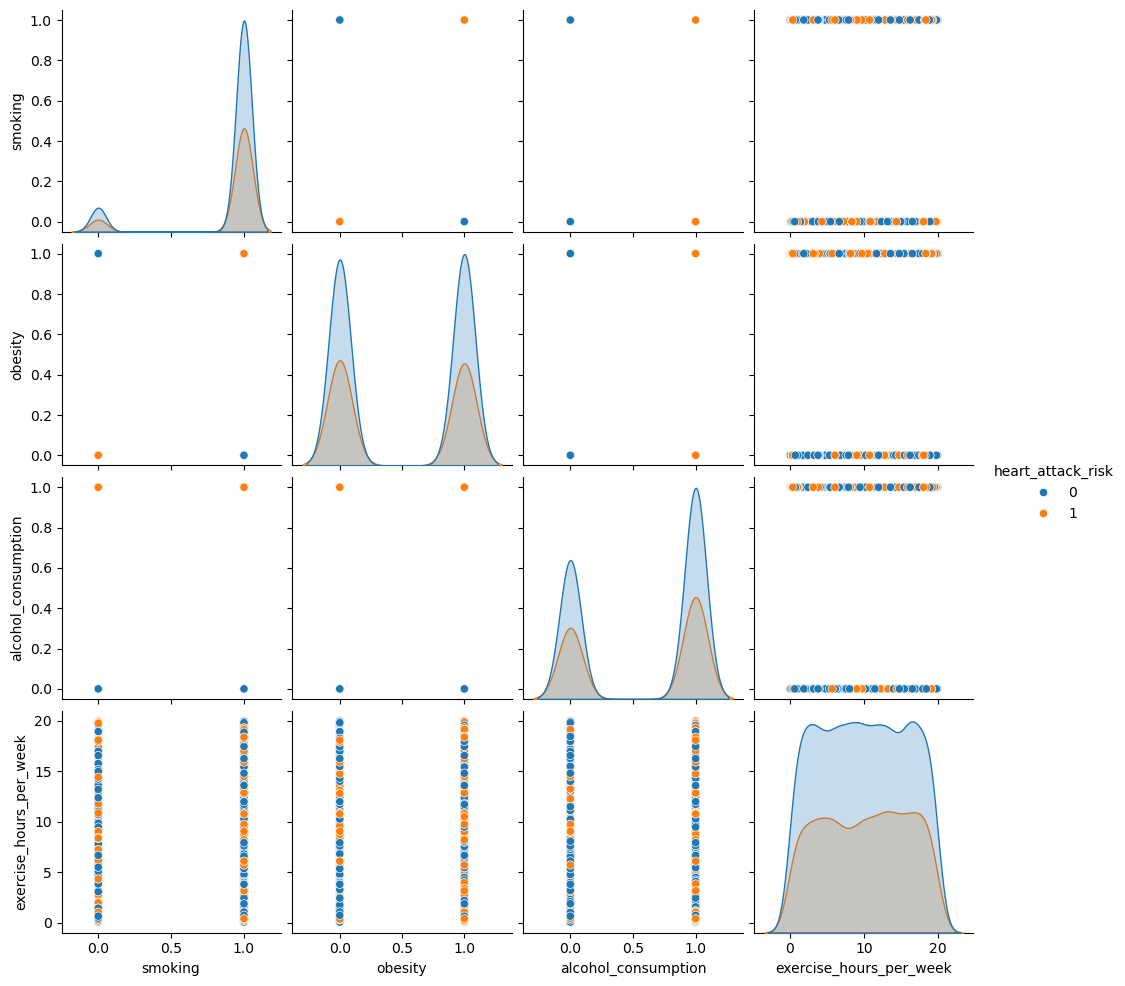

In [13]:
subset2 = df.iloc[:, 6:11]
subset2['heart_attack_risk'] = df['heart_attack_risk']

sns.pairplot(subset2, hue='heart_attack_risk',height=2.5)
plt.show()

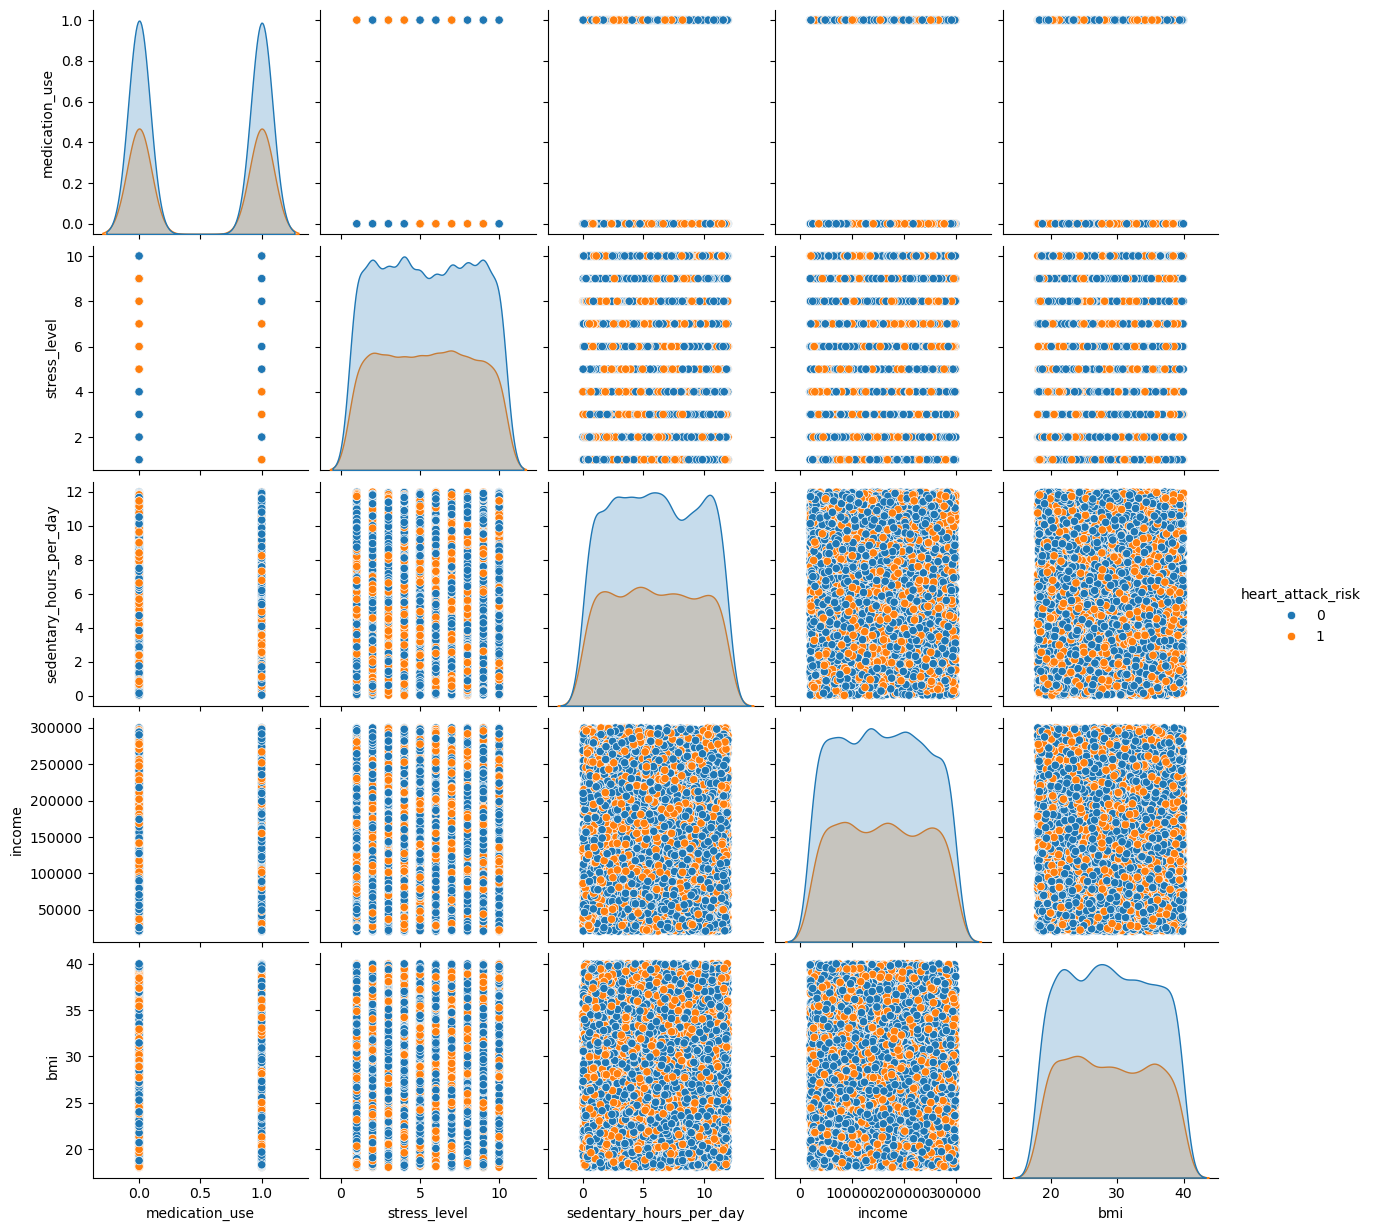

In [14]:
subset3 = df.iloc[:, 12:17]
subset3['heart_attack_risk'] = df['heart_attack_risk']

sns.pairplot(subset3, hue='heart_attack_risk',height=2.5)
plt.show()

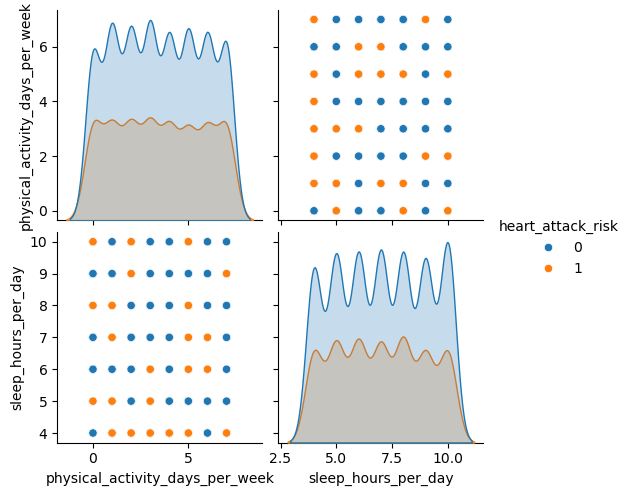

In [15]:
subset4 = df.iloc[:, 18:22]
subset4['heart_attack_risk'] = df['heart_attack_risk']

sns.pairplot(subset4, hue='heart_attack_risk',height=2.5)
plt.show()

/var/folders/pv/mkxvrtmj3p531hhmkxtn40tw0000gn/T/ipykernel_67035/2375290846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset5['heart_attack_risk'] = df['heart_attack_risk']


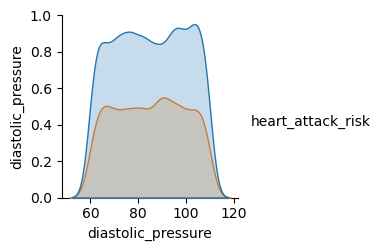

In [16]:
subset5 = df.iloc[:, 23:26]
subset5['heart_attack_risk'] = df['heart_attack_risk']

sns.pairplot(subset5, hue='heart_attack_risk',height=2.5)
plt.show()

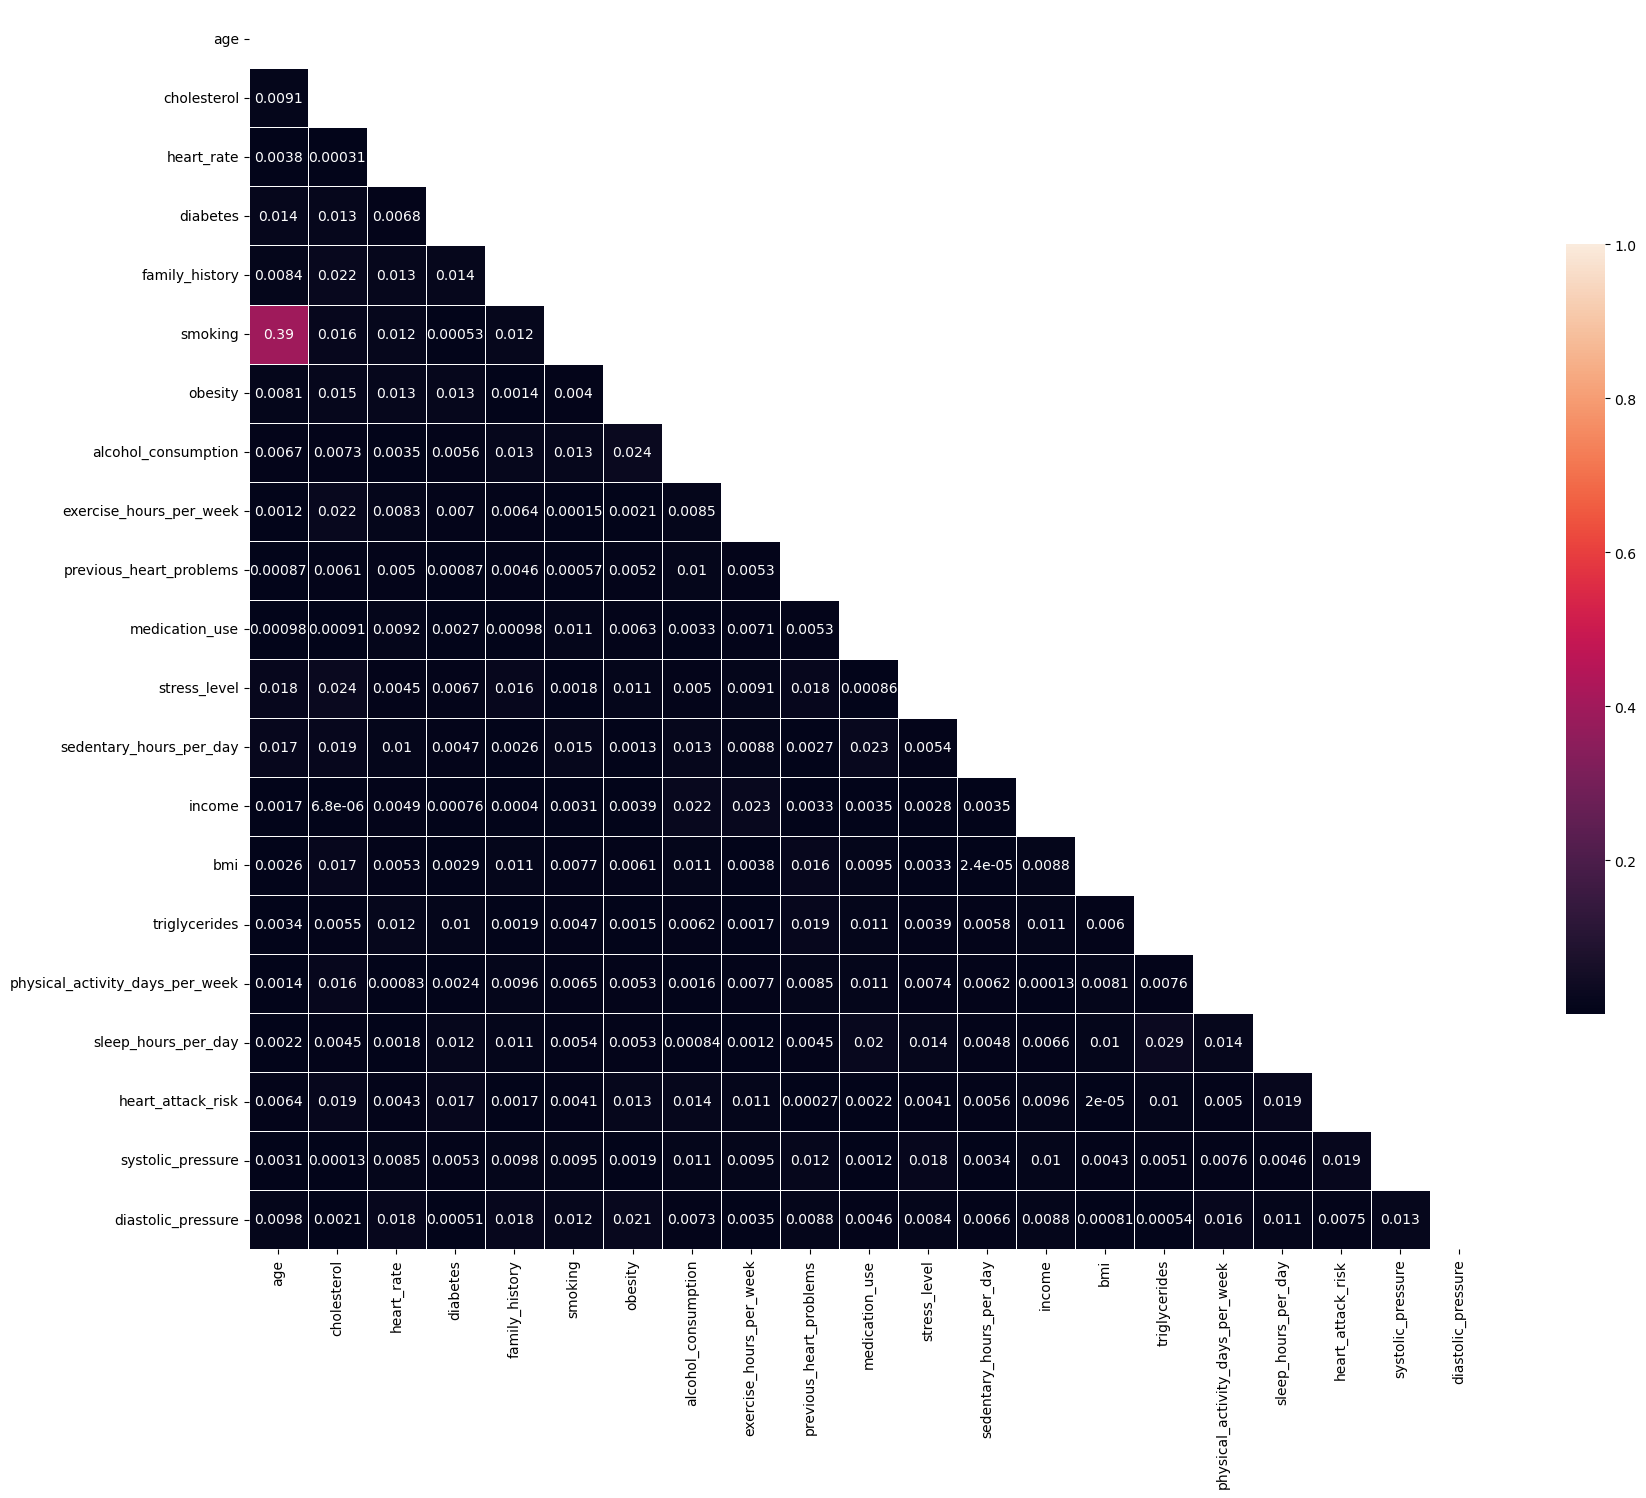

In [17]:
numerical_columns = df.select_dtypes(include='number')


corr=np.abs(numerical_columns.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Balance Check

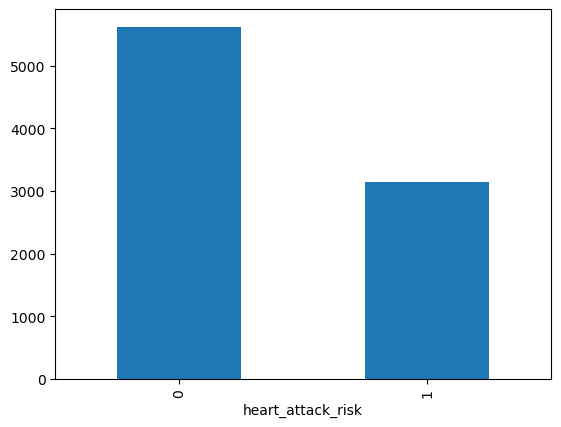

In [19]:
heart_attack_risk = df['heart_attack_risk'].value_counts()
heart_attack_risk.plot(kind='bar')
plt.show()

### Oversampling

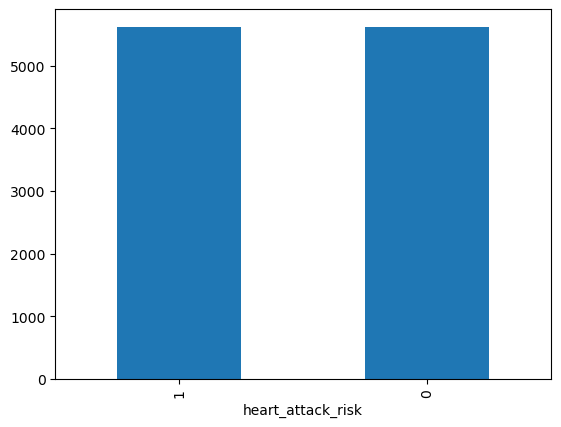

In [21]:
from sklearn.utils import resample

risk = df[df['heart_attack_risk'] == 1]
no_risk = df[df['heart_attack_risk'] == 0]

len(risk),len(no_risk)

yes_oversampled = resample(risk, replace=True, n_samples = len(no_risk), random_state=0)

over_sampling = pd.concat([yes_oversampled, no_risk])

heart_attack_risk_plt = over_sampling['heart_attack_risk'].value_counts()
heart_attack_risk_plt.plot(kind='bar')
plt.show()

### Undersampling

/var/folders/pv/mkxvrtmj3p531hhmkxtn40tw0000gn/T/ipykernel_67035/1352383306.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  no_heart_attack_undersampled.plt = under_sampling['heart_attack_risk'].value_counts()


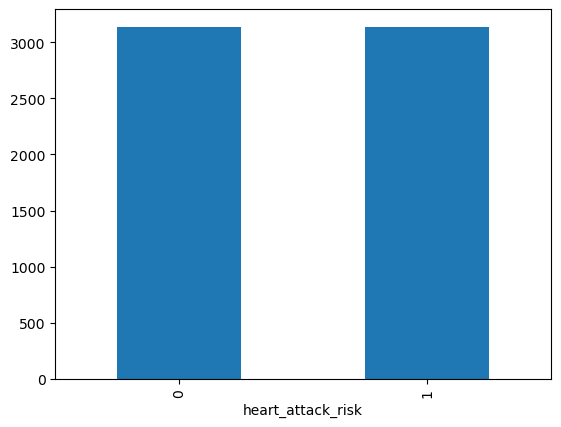

In [23]:
no_heart_attack_undersampled = resample(no_risk,
                                    replace=False,
                                    n_samples = len(risk),
                                    random_state=0)

under_sampling = pd.concat([no_heart_attack_undersampled, risk])

no_heart_attack_undersampled.plt = under_sampling['heart_attack_risk'].value_counts()
no_heart_attack_undersampled.plt.plot(kind='bar')
plt.show()

### Normalization and Transformation

In [25]:
#NUMERICAL TRANSFORMATION
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

over_sampling = over_sampling.reset_index(drop=True)  # Reset index if needed

#OneHotEncoder categorical columns
df_categorical_columns = over_sampling[['diabetes','family_history','smoking','obesity','alcohol_consumption','diet','previous_heart_problems','medication_use','sex','country']]
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(df_categorical_columns)

cat_trans_np = ohe.transform(df_categorical_columns)
cat_df = pd.DataFrame(cat_trans_np, columns=ohe.get_feature_names_out())

#Normalizing numerical columns
df_numerical_columns = over_sampling[["age","cholesterol","heart_rate","exercise_hours_per_week","stress_level","sedentary_hours_per_day","income","bmi","triglycerides","physical_activity_days_per_week","systolic_pressure","diastolic_pressure"]]
normalizer = MinMaxScaler()
normalizer.fit(df_numerical_columns)

num_trans_np = normalizer.transform(over_sampling[["age","cholesterol","heart_rate","exercise_hours_per_week","stress_level","sedentary_hours_per_day","income","bmi","triglycerides","physical_activity_days_per_week","systolic_pressure","diastolic_pressure"]])
num_df = pd.DataFrame(num_trans_np, columns = df_numerical_columns.columns, index=over_sampling.index)

df_norm_over = pd.concat([num_df, cat_df], axis=1)
df_norm_over["heart_attack_risk"] = over_sampling["heart_attack_risk"]
df_norm_over

,age,cholesterol,heart_rate,exercise_hours_per_week,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,...,country_New Zealand,country_Nigeria,country_South Africa,country_South Korea,country_Spain,country_Thailand,country_United Kingdom,country_United States,country_Vietnam,heart_attack_risk
0,0.541667,0.521429,0.742857,0.311924,0.444444,0.111371,0.188769,0.244488,0.929870,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.069444,0.217857,0.814286,0.106523,0.777778,0.823741,0.433907,0.330493,0.889610,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.833333,0.310714,0.257143,0.045519,0.888889,0.614390,0.591471,0.717008,0.783117,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.888889,0.053571,0.614286,0.919237,0.777778,0.280751,0.496266,0.486757,0.988312,0.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.875000,0.553571,1.000000,0.414041,0.444444,0.173603,0.900190,0.628235,0.067532,0.285714,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11243,0.097222,0.667857,0.542857,0.163519,0.222222,0.876945,0.211328,0.703210,0.345455,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
11244,0.569444,0.921429,0.842857,0.092791,0.333333,0.624962,0.179902,0.999038,0.166234,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11245,0.583333,0.003571,0.300000,0.395819,0.777778,0.901096,0.769432,0.075179,0.048052,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
11246,0.138889,0.000000,0.471429,0.827954,0.777778,0.319552,0.706769,0.272406,0.762338,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
#NUMERICAL TRANSFORMATION
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

under_sampling = under_sampling.reset_index(drop=True)  # Reset index if needed

#OneHotEncoder categorical columns
df_categorical_columns = under_sampling[['diabetes','family_history','smoking','obesity','alcohol_consumption','diet','previous_heart_problems','medication_use','sex','country']]
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(df_categorical_columns)

cat_trans_np = ohe.transform(df_categorical_columns)
cat_df = pd.DataFrame(cat_trans_np, columns=ohe.get_feature_names_out())

#Normalizing numerical columns
df_numerical_columns = under_sampling[["age","cholesterol","heart_rate","exercise_hours_per_week","stress_level","sedentary_hours_per_day","income","bmi","triglycerides","physical_activity_days_per_week","systolic_pressure","diastolic_pressure"]]
normalizer = MinMaxScaler()
normalizer.fit(df_numerical_columns)

num_trans_np = normalizer.transform(under_sampling[["age","cholesterol","heart_rate","exercise_hours_per_week","stress_level","sedentary_hours_per_day","income","bmi","triglycerides","physical_activity_days_per_week","systolic_pressure","diastolic_pressure"]])
num_df = pd.DataFrame(num_trans_np, columns = df_numerical_columns.columns, index=under_sampling.index)

under_sampling = under_sampling.reset_index(drop=True)  # Reset index if needed

df_norm_under = pd.concat([num_df, cat_df], axis=1)
df_norm_under["heart_attack_risk"] = under_sampling["heart_attack_risk"]
df_norm_under

,age,cholesterol,heart_rate,exercise_hours_per_week,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,...,country_New Zealand,country_Nigeria,country_South Africa,country_South Korea,country_Spain,country_Thailand,country_United Kingdom,country_United States,country_Vietnam,heart_attack_risk
0,0.333333,0.592857,0.871429,0.401815,0.444444,0.693339,0.482243,0.787744,0.137662,0.142857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.930556,0.832143,0.042857,0.225883,0.666667,0.421267,0.045660,0.874169,0.762338,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.638889,0.082143,0.085714,0.435909,0.222222,0.156083,0.851050,0.689178,0.600000,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.583333,0.253571,0.871429,0.512053,1.000000,0.368712,0.190434,0.526200,0.229870,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.958333,0.435714,0.942857,0.732360,0.888889,0.197165,0.546225,0.741711,0.928571,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6273,0.888889,0.682143,0.671429,0.410018,0.666667,0.700257,0.433950,0.440596,0.629870,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6274,0.861111,0.939286,0.728571,0.303998,0.222222,0.686246,0.290394,0.113047,0.187013,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6275,0.055556,0.810714,0.971429,0.190871,0.000000,0.565549,0.750907,0.104162,0.793506,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6276,0.402778,0.464286,0.928571,0.157245,0.444444,0.197861,0.060509,0.791249,0.645455,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

features = df_norm_over.drop(columns = ['heart_attack_risk'])
target = df_norm_over['heart_attack_risk']

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(features, target, test_size = 0.20, random_state=0)

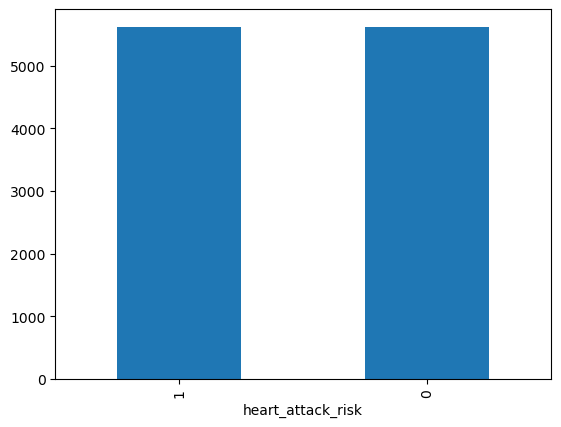

In [29]:
heart_attack_risk_over = df_norm_over['heart_attack_risk'].value_counts()
heart_attack_risk_over.plot(kind='bar')
plt.show()

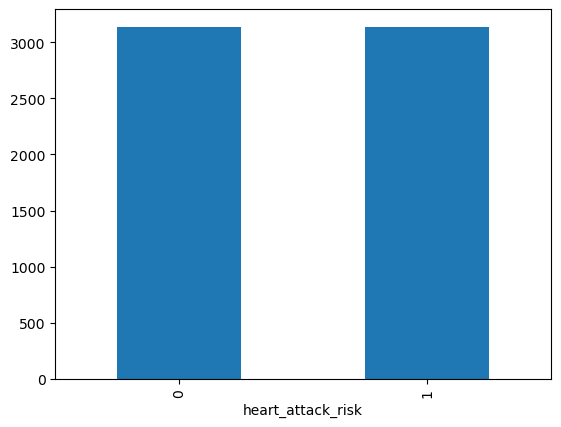

In [30]:
features = df_norm_under.drop(columns = ['heart_attack_risk'])
target = df_norm_under['heart_attack_risk']

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(features, target, test_size = 0.20, random_state=0)

heart_attack_risk_under = df_norm_under['heart_attack_risk'].value_counts()
heart_attack_risk_under.plot(kind='bar')
plt.show()

### KNNeighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_over, y_train_over)
pred = knn.predict(X_test_over)


print(f"The accuracy of the model is {knn.score(X_test_over, y_test_over)*100: .2f}%")

The accuracy of the model is  58.98%


In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_under, y_train_under)
pred = knn.predict(X_test_under)


print(f"The accuracy of the model is {knn.score(X_test_under, y_test_under)*100: .2f}%")

The accuracy of the model is  50.16%


## Bagging

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

bagging_clas_over = BaggingClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=100,  max_samples = 1000)
bagging_clas_over.fit(X_train_over, y_train_over)
y_pred_test_bag_over = bagging_clas_over.predict(X_test_over)


print(f"Accuracy: {accuracy_score(y_test_over, y_pred_test_bag_over):.2f}")
print(f"Precision: {precision_score(y_test_over, y_pred_test_bag_over):.2f}")
print(f"Recall: {recall_score(y_test_over, y_pred_test_bag_over)}")
print(f"F1 Score: {f1_score(y_test_over, y_pred_test_bag_over):.2f}")
print(f"R2 score {bagging_clas_over.score(X_test_over, y_test_over):.2f}")

Accuracy: 0.66
Precision: 0.62
Recall: 0.7520814061054579
F1 Score: 0.68
R2 score 0.66


In [36]:
bagging_clas_under = BaggingClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=100,  max_samples = 1000)
bagging_clas_under.fit(X_train_under, y_train_under)
y_pred_test_bag_under = bagging_clas_under.predict(X_test_under)


print(f"Accuracy: {accuracy_score(y_test_under, y_pred_test_bag_under):.2f}")
print(f"Precision: {precision_score(y_test_under, y_pred_test_bag_under):.2f}")
print(f"Recall: {recall_score(y_test_under, y_pred_test_bag_under):.2f}")
print(f"F1 Score: {f1_score(y_test_under, y_pred_test_bag_under):.2f}")
print(f"R2 score {bagging_clas_under.score(X_test_under, y_test_under):.2f}")

Accuracy: 0.49
Precision: 0.49
Recall: 0.45
F1 Score: 0.47
R2 score 0.49


### Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
forest_over = RandomForestClassifier(n_estimators=100, max_depth=20)
forest_over.fit(X_train_over, y_train_over)
y_pred_test_rf_over = forest_over.predict(X_test_over)

print(f"Accuracy: {accuracy_score(y_test_over, y_pred_test_rf_over):.2f}")
print(f"Precision: {precision_score(y_test_over, y_pred_test_rf_over):.2f}")
print(f"Recall: {recall_score(y_test_over, y_pred_test_rf_over)}")
print(f"F1 Score: {f1_score(y_test_over, y_pred_test_rf_over):.2f}")
print(f"R2 score {forest_over.score(X_test_over, y_test_over):.2f}")

Accuracy: 0.85
Precision: 0.89
Recall: 0.793709528214616
F1 Score: 0.84
R2 score 0.85


In [39]:
forest_under = RandomForestClassifier(n_estimators=100, max_depth=20)
forest_under.fit(X_train_under, y_train_under)
y_pred_test_rf_under = forest_under.predict(X_test_under)

print(f"Accuracy: {accuracy_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"Precision: {precision_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"Recall: {recall_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"F1 Score: {f1_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"R2 score {forest_under.score(X_test_under, y_test_under):.2f}")

Accuracy: 0.49
Precision: 0.49
Recall: 0.47
F1 Score: 0.48
R2 score 0.49


### Gradient Boosting

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clas_over = GradientBoostingClassifier(max_depth=20, n_estimators=100)
gb_clas_over.fit(X_train_over, y_train_over)
y_pred_test_gb_under = gb_clas_over.predict(X_train_over)

print(f"Accuracy: {accuracy_score(y_test_over, y_pred_test_rf_over):.2f}")
print(f"Precision: {precision_score(y_test_over, y_pred_test_rf_over):.2f}")
print(f"Recall: {recall_score(y_test_over, y_pred_test_rf_over)}")
print(f"F1 Score: {f1_score(y_test_over, y_pred_test_rf_over):.2f}")
print(f"R2 score, {gb_clas_over.score(X_test_over, y_test_over): .2f}")

Accuracy: 0.85
Precision: 0.89
Recall: 0.7761332099907493
F1 Score: 0.83
R2 score,  0.85


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clas_under = GradientBoostingClassifier(max_depth=20, n_estimators=100)
gb_clas_under.fit(X_train_under, y_train_under)
y_pred_test_gb_over = gb_clas_under.predict(X_train_under)

print(f"Accuracy: {accuracy_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"Precision: {precision_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"Recall: {recall_score(y_test_under, y_pred_test_rf_under)}")
print(f"F1 Score: {f1_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"R2 score, {gb_clas_under.score(X_test_under, y_test_under): .2f}")

Accuracy: 0.49
Precision: 0.49
Recall: 0.47
F1 Score: 0.48
R2 score,  0.51


### Adaptative Boosting

In [110]:
from sklearn.ensemble import AdaBoostClassifier
ada_clas_over = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=100)
ada_clas_over.fit(X_train_over, y_train_over)
y_pred_test_ada_over = ada_clas_over.predict(X_train_over)

print(f"Accuracy: {accuracy_score(y_test_over, y_pred_test_rf_over):.2f}")
print(f"Precision: {precision_score(y_test_over, y_pred_test_rf_over):.2f}")
print(f"Recall: {recall_score(y_test_over, y_pred_test_rf_over)}")
print(f"F1 Score: {f1_score(y_test_over, y_pred_test_rf_over):.2f}")
print(f"R2 score, {ada_clas_over.score(X_test_over, y_test_over): .2f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.85
Precision: 0.89
Recall: 0.7761332099907493
F1 Score: 0.83
R2 score,  0.88


In [45]:
from sklearn.ensemble import AdaBoostClassifier
ada_clas_under = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=100)
ada_clas_under.fit(X_train_under, y_train_under)
y_pred_test_ada_under = ada_clas_under.predict(X_train_under)

print(f"Accuracy: {accuracy_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"Precision: {precision_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"Recall: {recall_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"F1 Score: {f1_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"R2 score, {ada_clas_under.score(X_test_under, y_test_under): .2f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.49
Precision: 0.49
Recall: 0.47
F1 Score: 0.48
R2 score,  0.51


### Grid Search

In [144]:
# First we need to setup a dictionary with all the values that we want to try for each hyprerparameter
import time
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameter search space
parameter_grid = {
    "max_depth": [10, 50],
    "min_samples_split": [4, 16],
    "max_leaf_nodes": [100, 250],  # Fixed order
    "max_features": ["sqrt", "log2"]
}

# Create Decision Tree model instance
dt = forest_over

# Define confidence level and cross-validation folds
confidence_level = 0.95
folds = 10

# Initialize GridSearchCV with Recall Score
gs_over = GridSearchCV(dt, param_grid=parameter_grid, cv=folds, verbose=10, scoring="recall")

# Fit model using GridSearchCV
start_time = time.time()
gs_over.fit(X_train_over, y_train_over)
end_time = time.time()

print("\n")
print(f"Time taken to find the best combination of hyperparameters: {end_time - start_time:.4f} seconds")
print("\n")

# Print best hyperparameters and Recall Score
print(f"The best combination of hyperparameters: {gs_over.best_params_}")
print(f"The Best Recall Score: {gs_over.best_score_:.4f}")

# Convert GridSearchCV results to DataFrame
results_gs_df_over = pd.DataFrame(gs_over.cv_results_).sort_values(by="mean_test_score", ascending=False)

# Compute confidence interval for Recall Score
gs_mean_score_over = results_gs_df_over.iloc[0, -3]
gs_sem_over = results_gs_df_over.iloc[0, -2] / np.sqrt(folds)
gs_tc_over = st.t.ppf(1 - ((1 - confidence_level) / 2), df=folds - 1)

gs_lower_bound_over = gs_mean_score_over - (gs_tc_over * gs_sem_over)
gs_upper_bound_over = gs_mean_score_over + (gs_tc_over * gs_sem_over)

print(f"The Recall Score confidence interval for the best model is: \
    ({gs_lower_bound_over:.4f}, {gs_mean_score_over:.4f}, {gs_upper_bound_over:.4f})")

display(results_gs_df_over)

# Store the best model
best_model_over = gs_over.best_estimator_

# Evaluate the model on test set
y_pred_test_over = best_model_over.predict(X_test_over)

print("\n")
print(f"Accuracy: {accuracy_score(y_test_over, y_pred_test_over):.2f}")
print(f"Precision: {precision_score(y_test_over, y_pred_test_over):.2f}")
print(f"Recall: {recall_score(y_test_over, y_pred_test_over):.2f}")
print(f"F1 Score: {f1_score(y_test_over, y_pred_test_over):.2f}")
print(f"Test R² Score (Not Needed): {best_model_over.score(X_test_over, y_test_over):.4f}")  # Consider removing this
print("\n")

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=100, min_samples_split=4
[CV 1/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=100, min_samples_split=4;, score=0.740 total time=   0.6s
[CV 2/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=100, min_samples_split=4
[CV 2/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=100, min_samples_split=4;, score=0.751 total time=   0.5s
[CV 3/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=100, min_samples_split=4
[CV 3/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=100, min_samples_split=4;, score=0.718 total time=   0.6s
[CV 4/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=100, min_samples_split=4
[CV 4/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=100, min_samples_split=4;, score=0.703 total time=   0.5s
[CV 5/10; 1/16] START max_depth=10, max_features=sqrt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.599942,0.013269,0.006935,0.000331,10,sqrt,250,4,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.768722,...,0.766520,0.755507,0.740659,0.753846,0.762637,0.770925,0.799559,0.767124,0.021461,1
14,0.519613,0.022781,0.007638,0.000266,50,log2,250,4,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.779736,...,0.753304,0.720264,0.760440,0.756044,0.773626,0.773128,0.781938,0.758967,0.019190,2
10,0.725194,0.026022,0.008024,0.000387,50,sqrt,250,4,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.797357,...,0.742291,0.748899,0.742857,0.747253,0.758242,0.742291,0.786344,0.755672,0.020182,3
6,0.452059,0.004921,0.006975,0.000210,10,log2,250,4,"{'max_depth': 10, 'max_features': 'log2', 'max...",0.759912,...,0.731278,0.733480,0.727473,0.740659,0.789011,0.759912,0.790749,0.752807,0.023246,4
15,0.537200,0.019555,0.007907,0.000291,50,log2,250,16,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.781938,...,0.731278,0.746696,0.742857,0.771429,0.758242,0.715859,0.790749,0.750601,0.024090,5
11,0.768505,0.021093,0.008514,0.000364,50,sqrt,250,16,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.759912,...,0.715859,0.748899,0.756044,0.760440,0.762637,0.744493,0.742291,0.747295,0.014268,6
4,0.415731,0.015802,0.006172,0.000467,10,log2,100,4,"{'max_depth': 10, 'max_features': 'log2', 'max...",0.746696,...,0.744493,0.729075,0.734066,0.734066,0.734066,0.740088,0.744493,0.737841,0.016688,7
12,0.426084,0.018981,0.006449,0.001051,50,log2,100,4,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.755507,...,0.689427,0.737885,0.740659,0.736264,0.749451,0.762115,0.740088,0.734972,0.022540,8
3,0.593097,0.009138,0.006662,0.000228,10,sqrt,250,16,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.726872,...,0.700441,0.737885,0.718681,0.749451,0.729670,0.735683,0.746696,0.732335,0.015101,9
0,0.547249,0.029139,0.006225,0.000446,10,sqrt,100,4,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.740088,...,0.702643,0.711454,0.780220,0.720879,0.720879,0.742291,0.726872,0.731449,0.021471,10




Accuracy: 0.74
Precision: 0.70
Recall: 0.79
F1 Score: 0.74
Test R² Score (Not Needed): 0.7364




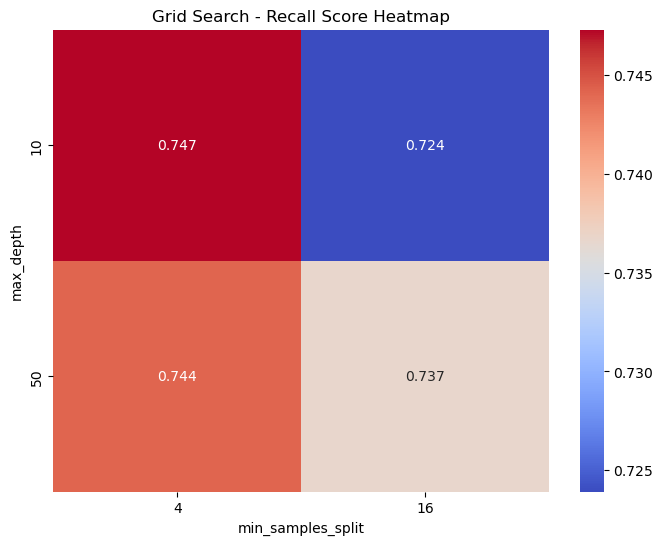

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert GridSearchCV results to DataFrame
results_df = pd.DataFrame(gs_over.cv_results_)

# Convert hyperparameters to numeric types (if they are not already)
results_df["param_max_depth"] = results_df["param_max_depth"].astype(int)
results_df["param_min_samples_split"] = results_df["param_min_samples_split"].astype(int)

# Group by hyperparameters and compute mean Recall Score
pivot_table = results_df.groupby(["param_max_depth", "param_min_samples_split"])["mean_test_score"].mean().unstack()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Grid Search - Recall Score Heatmap")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()

In [48]:
# Now we need to create an intance of the GridSearchCV class
gs_under = GridSearchCV(dt, param_grid=parameter_grid, cv=folds, verbose=10) # Here the "cv" allows you to define the number of folds to use.

start_time = time.time()
gs_under.fit(X_train_under, y_train_under)
end_time = time.time()

print("\n")
print(f"Time taken to find the best combination of hyperparameters among the given ones: {end_time - start_time: .4f} seconds")
print("\n")


print(f"The best combination of hyperparameters has been: {gs_over.best_params_}")
print(f"The R2 is: {gs_under.best_score_: .4f}")

results_gs_df_under = pd.DataFrame(gs_under.cv_results_).sort_values(by="mean_test_score", ascending=False)

gs_mean_score_under = results_gs_df_under.iloc[0,-3]
gs_sem_under = results_gs_df_under.iloc[0,-2] / np.sqrt(folds)

gs_tc_under = st.t.ppf(1-((1-confidence_level)/2), df=folds-1)
gs_lower_bound_under = gs_mean_score_under - ( gs_tc_under * gs_sem_under)
gs_upper_bound_under = gs_mean_score_under + ( gs_tc_under * gs_sem_under)

print(f"The R2 confidence interval for the best combination of hyperparameters is: \
    ({gs_lower_bound_under: .4f}, {gs_mean_score_under: .4f}, {gs_upper_bound_under: .4f}) ")

display(results_gs_df_under)

# Let's store the best model
best_model_under = gs_under.best_estimator_

# Now is time evaluate the model in the test set
y_pred_test_df_under = best_model_under.predict(X_test_under)
y_pred_test_df_under = best_model_under.predict(X_test_under)

y_pred_test_under = best_model_under.predict(X_test_under)

print("\n")
print(f"Accuracy: {accuracy_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"Precision: {precision_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"Recall: {recall_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"F1 Score: {f1_score(y_test_under, y_pred_test_rf_under):.2f}")
print(f"Test R2 score:  {best_model_under.score(X_test_under, y_test_under): .4f}")
print("\n")

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 1/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.511 total time=   0.0s
[CV 2/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 2/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.507 total time=   0.0s
[CV 3/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 3/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.498 total time=   0.0s
[CV 4/10; 1/16] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 4/10; 1/16] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.520 total time=   0.0s
[CV 5/10; 1/16] START max_depth=10, max_features=sqrt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
9,0.007009,0.000870,0.000595,0.000040,50,sqrt,250,16,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.512922,...,0.492032,0.496016,0.515936,0.503984,0.488048,0.509960,0.541833,0.509159,0.014784,1
2,0.005334,0.001009,0.000714,0.000153,10,sqrt,100,4,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.502982,...,0.511952,0.484064,0.484064,0.511952,0.494024,0.545817,0.490040,0.501796,0.018719,2
4,0.004364,0.000415,0.000615,0.000094,10,log2,250,4,"{'max_depth': 10, 'max_features': 'log2', 'max...",0.491054,...,0.517928,0.486056,0.500000,0.503984,0.500000,0.515936,0.529880,0.500604,0.015911,3
10,0.005110,0.001062,0.000587,0.000069,50,sqrt,100,4,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.489066,...,0.519920,0.492032,0.490040,0.494024,0.515936,0.535857,0.478088,0.500603,0.017550,4
0,0.006065,0.000399,0.000700,0.000114,10,sqrt,250,4,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.510934,...,0.519920,0.474104,0.486056,0.494024,0.503984,0.527888,0.482072,0.500395,0.016072,5
1,0.005956,0.000509,0.000760,0.000183,10,sqrt,250,16,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.477137,...,0.519920,0.492032,0.525896,0.474104,0.470120,0.529880,0.535857,0.499612,0.025195,6
11,0.005233,0.001020,0.000648,0.000069,50,sqrt,100,16,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.499006,...,0.492032,0.486056,0.494024,0.474104,0.500000,0.501992,0.537849,0.499604,0.016962,7
8,0.006838,0.000899,0.000680,0.000088,50,sqrt,250,4,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.477137,...,0.537849,0.480080,0.486056,0.519920,0.501992,0.537849,0.480080,0.499017,0.026386,8
3,0.005659,0.000614,0.000646,0.000068,10,sqrt,100,16,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.477137,...,0.505976,0.486056,0.523904,0.466135,0.472112,0.531873,0.535857,0.497221,0.024687,9
13,0.007957,0.005871,0.001469,0.001742,50,log2,250,16,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.493042,...,0.490040,0.482072,0.515936,0.505976,0.496016,0.511952,0.490040,0.493832,0.013564,10




Accuracy: 0.49
Precision: 0.49
Recall: 0.47
F1 Score: 0.48
Test R2 score:   0.4992




### DecisionTree

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

tree_over = forest_over
tree_over.fit(X_train_over, y_train_over)
y_pred_tree_over = tree_over.predict(X_test_over)

tree_importance_over = {feature : importance for feature, importance in zip(X_train_over.columns, tree_over.feature_importances_)}

print(f"Accuracy: {accuracy_score(y_test_over, y_pred_tree_over):.2f}")
print(f"Precision: {precision_score(y_test_over, y_pred_tree_over):.2f}")
print(f"Recall: {recall_score(y_test_over, y_pred_tree_over)}")
print(f"F1 Score: {f1_score(y_test_over, y_pred_tree_over):.2f}")
print(f"R2 score {tree_over.score(X_test_over, y_test_over):.2f}")

Accuracy: 0.85
Precision: 0.90
Recall: 0.7816836262719704
F1 Score: 0.84
R2 score 0.85


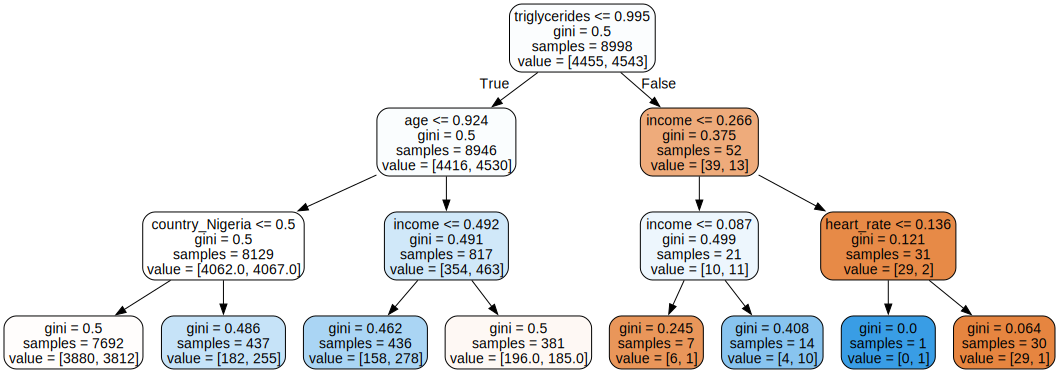

In [154]:
import graphviz

tree_over = DecisionTreeClassifier(max_depth=3)
tree_over.fit(X_train_over, y_train_over)
dot_data = export_graphviz(tree_over, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_over.columns)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [52]:
tree_under = DecisionTreeClassifier(max_depth=10)
tree_under.fit(X_train_under, y_train_under)
y_pred_tree_under = tree_under.predict(X_test_under)

tree_importance_under = {feature : importance for feature, importance in zip(X_train_under.columns, tree_under.feature_importances_)}

print(f"Accuracy: {accuracy_score(y_test_under, y_pred_tree_under):.2f}")
print(f"Precision: {precision_score(y_test_under, y_pred_tree_under):.2f}")
print(f"Recall: {recall_score(y_test_under, y_pred_tree_under):.2f}")
print(f"F1 Score: {f1_score(y_test_under, y_pred_tree_under):.2f}")
print(f"R2 score {tree_over.score(X_test_under, y_test_under):.2f}")

Accuracy: 0.50
Precision: 0.50
Recall: 0.44
F1 Score: 0.47
R2 score 0.52


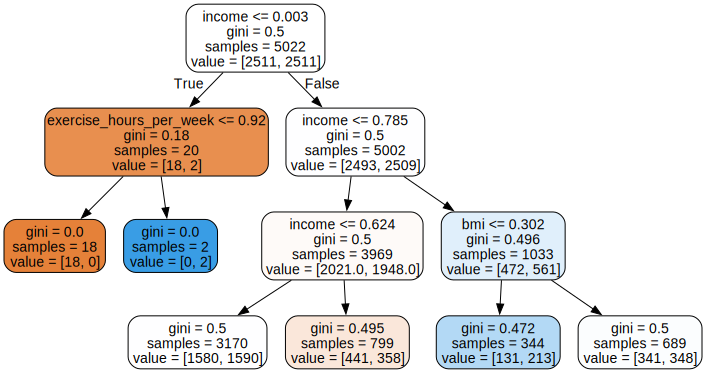

In [156]:
tree_under = DecisionTreeClassifier(max_depth=3)
tree_under.fit(X_train_under, y_train_under)
dot_data = export_graphviz(tree_under, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_under.columns)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Bayesian Search

In [160]:
import optuna
import numpy as np
import scipy.stats as st
import time
from sklearn.ensemble import RandomForestClassifier  # Import RandomForest instead of DecisionTree
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score

def objective(trial, confidence_level, folds):

    # Define hyperparameter search space for RandomForest
    max_depth = trial.suggest_int("max_depth", 10, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 4, 16)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 250, 1000)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])
    n_estimators = trial.suggest_int("n_estimators", 50, 300)  # Tuning number of trees

    # Initialize Random Forest Classifier with trial parameters
    dt = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_leaf_nodes=max_leaf_nodes,
        max_features=max_features,
        random_state=42,  # Ensures reproducibility
        n_jobs=-1  # Utilizes all CPU cores for efficiency
    )

    # Define Stratified K-Fold to maintain class balance in cross-validation
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

    # Compute cross-validated Recall Score
    scores = cross_val_score(dt, X_train_over, y_train_over, cv=skf, scoring=make_scorer(recall_score))  # Using Recall

    mean_score = np.mean(scores)
    sem = np.std(scores, ddof=1) / np.sqrt(folds)

    tc = st.t.ppf(1 - ((1 - confidence_level) / 2), df=folds - 1)
    lower_bound = mean_score - (tc * sem)
    upper_bound = mean_score + (tc * sem)

    # Store confidence interval for each trial
    trial.set_user_attr("CV_score_summary", [round(lower_bound, 4), round(np.mean(scores), 4), round(upper_bound, 4)])

    return np.mean(scores)

# Run Optuna Study
confidence_level = 0.95
folds = 10

start_time = time.time()
study = optuna.create_study(direction="maximize")  # Maximizing Recall Score
study.optimize(lambda trial: objective(trial, confidence_level, folds), n_trials=45)
end_time = time.time()

# Display results
print("\n")
print(f"Time taken to find the best combination of hyperparameters: {end_time - start_time:.4f} seconds")
print("\n")
print("The best combination of hyperparameters found was: ", study.best_params)
print(f"The best Recall Score found was: {study.best_value:.4f}")

[I 2025-02-28 08:20:47,856] A new study created in memory with name: no-name-408c5bf6-2830-46ea-b284-29f868f313c4
[I 2025-02-28 08:20:50,696] Trial 0 finished with value: 0.752807280824902 and parameters: {'max_depth': 42, 'min_samples_split': 14, 'max_leaf_nodes': 831, 'max_features': 'sqrt', 'n_estimators': 147}. Best is trial 0 with value: 0.752807280824902.
[I 2025-02-28 08:20:53,710] Trial 1 finished with value: 0.7543442900711623 and parameters: {'max_depth': 22, 'min_samples_split': 6, 'max_leaf_nodes': 962, 'max_features': 'sqrt', 'n_estimators': 152}. Best is trial 1 with value: 0.7543442900711623.
[I 2025-02-28 08:20:57,670] Trial 2 finished with value: 0.7695323619112165 and parameters: {'max_depth': 31, 'min_samples_split': 4, 'max_leaf_nodes': 379, 'max_features': 'log2', 'n_estimators': 273}. Best is trial 2 with value: 0.7695323619112165.
[I 2025-02-28 08:20:58,849] Trial 3 finished with value: 0.7228644043181488 and parameters: {'max_depth': 10, 'min_samples_split': 14,



Time taken to find the best combination of hyperparameters: 104.2651 seconds


The best combination of hyperparameters found was:  {'max_depth': 13, 'min_samples_split': 4, 'max_leaf_nodes': 589, 'max_features': 'sqrt', 'n_estimators': 94}
The best Recall Score found was: 0.7764


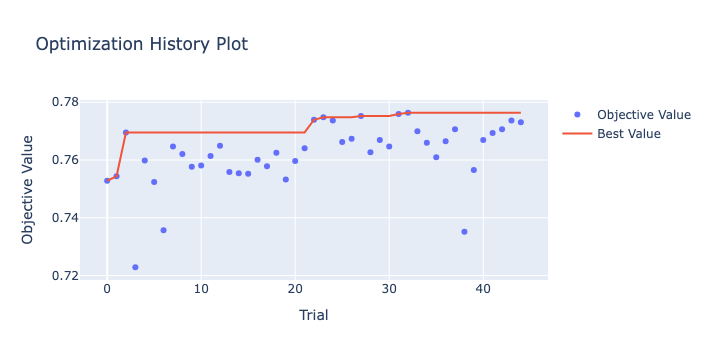

In [161]:
vis.plot_optimization_history(study)

In the previous plot, each marker represents a unique combination of the hyperparameters. However, we can't know which were the hyperparameter values in each combination. To gain more insights into this, we can do an slice plot

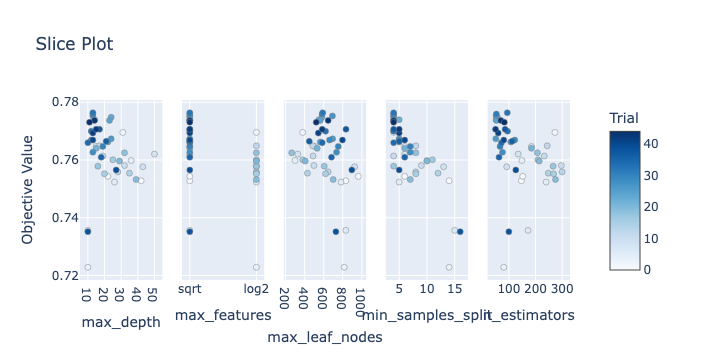

In [169]:
slice_plot = vis.plot_slice(study)
slice_plot.show()

It's also interesting to know what was the most important hyper-parameter to improve the model performance

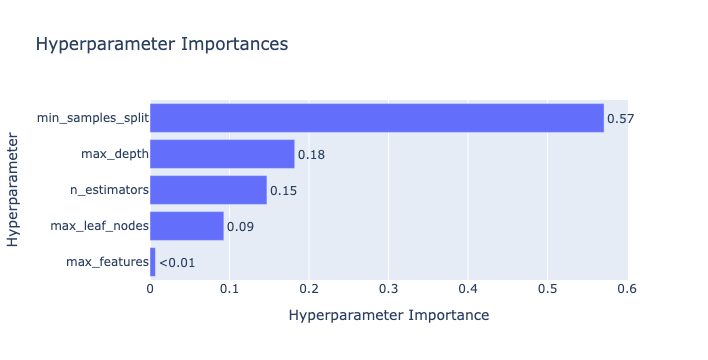

In [171]:
# Plot parameter importance
vis.plot_param_importances(study)

In [173]:
best_model_over = DecisionTreeClassifier(random_state=123, **study.best_params)
best_model_over.fit(X_train_over, y_train_over)
y_pred_test_over = best_model_over.predict(X_test_over)

print(f"Accuracy: {accuracy_score(y_test_over, y_pred_test_over):.2f}")
print(f"Precision: {precision_score(y_test_over, y_pred_test_over):.2f}")
print(f"Recall: {recall_score(y_test_over, y_pred_test_over):.2f}")
print(f"F1 Score: {f1_score(y_test_over, y_pred_test_over):.2f}")
print(f"Test R2 score:  {best_model_over.score(X_test_over, y_test_over): .3f}")

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'n_estimators'

As we can see, the R2 on the test set is not within the confidence interval. However, you need to keep inmind that this will only happen in 5% of all tests sets as the confidence interval compromises 95% of all the test cases